In [1]:
from keras.utils.np_utils import to_categorical
import keras
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Input
from keras.optimizers import Adam

%matplotlib inline

Using TensorFlow backend.


In [2]:
x_train = []
y_train = []

for dir in os.listdir("train"):
    if dir == ".DS_Store":
        continue
        
    dir1 = "train/" + dir
    label = 0
    
    if dir == "cat":
        label = 0
    elif dir == "dog":
        label = 1
        
    for file in os.listdir(dir1):
        if file != ".DS_Store":
            y_train.append(label)
            filepath = dir1 + "/" + file
            image = np.array(Image.open(filepath).resize((150, 150)))
            image = image.astype("float32")
            x_train.append(image / 255.)
            
x_train = np.array(x_train)
Y_train = to_categorical(y_train)

In [3]:
x_test = []
y_test = []

for dir in os.listdir("test"):
    if dir == ".DS_Store":
        continue
        
    dir2 = "test/" + dir
    label = 0
    
    if dir == "cat":
        label = 0
    elif dir == "dog":
        label = 1
        
    for file in os.listdir(dir2):
        if file != ".DS_Store":
            y_test.append(label)
            filepath = dir2 + "/" + file
            image = np.array(Image.open(filepath).resize((150, 150)))
            image = image.astype("float32")
            x_test.append(image / 255.)
            
x_test = np.array(x_test)
Y_test = to_categorical(y_test)

In [4]:
model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [5]:
bottleneck_features_train = model.predict(x_train)
bottleneck_features_test = model.predict(x_test)
print(bottleneck_features_train.shape)
print(bottleneck_features_test.shape)

(2000, 4, 4, 512)
(800, 4, 4, 512)


In [6]:
my_model = Sequential()
my_model.add(Flatten(input_shape=bottleneck_features_train.shape[1:]))
my_model.add(Dense(256))
my_model.add(Activation('relu'))
my_model.add(Dropout(0.5))
my_model.add(Dense(2))
my_model.add(Activation('softmax'))

my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 2,097,922
Trainable params: 2,097,922
Non-trainable params: 0
_________________________________________________________________


In [7]:
my_model.compile(loss='binary_crossentropy',                 
                    optimizer=Adam(),
                    metrics=['accuracy'])

In [8]:
batch_size = 32
epochs = 20
history = my_model.fit(bottleneck_features_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split=0.1,
                            verbose=2)

Train on 1800 samples, validate on 200 samples
Epoch 1/20
0s - loss: 0.5696 - acc: 0.8000 - val_loss: 0.2207 - val_acc: 0.9100
Epoch 2/20
0s - loss: 0.2691 - acc: 0.8894 - val_loss: 0.4889 - val_acc: 0.7650
Epoch 3/20
0s - loss: 0.2154 - acc: 0.9117 - val_loss: 0.3555 - val_acc: 0.8500
Epoch 4/20
0s - loss: 0.1635 - acc: 0.9333 - val_loss: 0.2036 - val_acc: 0.9100
Epoch 5/20
0s - loss: 0.1265 - acc: 0.9528 - val_loss: 0.3042 - val_acc: 0.8800
Epoch 6/20
0s - loss: 0.1151 - acc: 0.9583 - val_loss: 0.6123 - val_acc: 0.8100
Epoch 7/20
0s - loss: 0.0846 - acc: 0.9728 - val_loss: 0.4960 - val_acc: 0.8200
Epoch 8/20
0s - loss: 0.0881 - acc: 0.9700 - val_loss: 0.2192 - val_acc: 0.9150
Epoch 9/20
0s - loss: 0.0553 - acc: 0.9811 - val_loss: 0.3862 - val_acc: 0.8550
Epoch 10/20
0s - loss: 0.0479 - acc: 0.9856 - val_loss: 0.4065 - val_acc: 0.8600
Epoch 11/20
0s - loss: 0.0516 - acc: 0.9861 - val_loss: 0.4627 - val_acc: 0.8600
Epoch 12/20
0s - loss: 0.0447 - acc: 0.9833 - val_loss: 0.6109 - val_ac

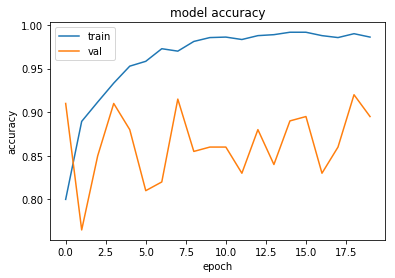

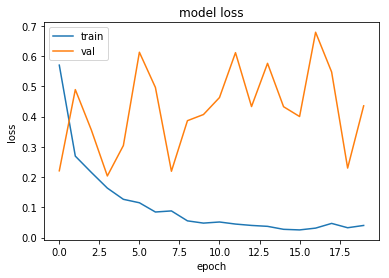

In [9]:
#正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
_, acc = my_model.evaluate(bottleneck_features_test, Y_test, verbose=0)
print('accuracy: {}'.format(acc))

accuracy: 0.91


In [11]:
result_dir = 'results'
model.save_weights(os.path.join(result_dir, 'bottleneck_fc_model.h5'))